In [17]:
from astropy.io import fits

import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import matplotlib.ticker as mticker
import os

sys.path.append('/appch/data/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory, NGTSField
from NGTS.GACF_utils import TIME_CONVERSIONS, medsig, rebin_err
from NGTS import NGTSObject

from ngtsio import ngtsio

from tqdm import tqdm as tqdm

XMATCH_LOCATION = '/appch/data/jtb34/NG0004-2950/cross_match/'
FILE_NAME = 'Uncut_Final_NG0004-2950.fits'

FIELDNAME = 'NG0004-2950' 
TEST = 'CYCLE1807'



In [6]:
xmatch_fits = fits.open(os.path.join(XMATCH_LOCATION, FILE_NAME))
xmatch_data = xmatch_fits[1]

In [7]:
xmatch_data.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1095 / length of dimension 1                          
NAXIS2  =                 3574 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  147 / number of table fields                         
TTYPE1  = 'Sequence_number'                                                     
TFORM1  = 'D       '                                                            
TTYPE2  = 'RA_DEG  '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC_DEG '        

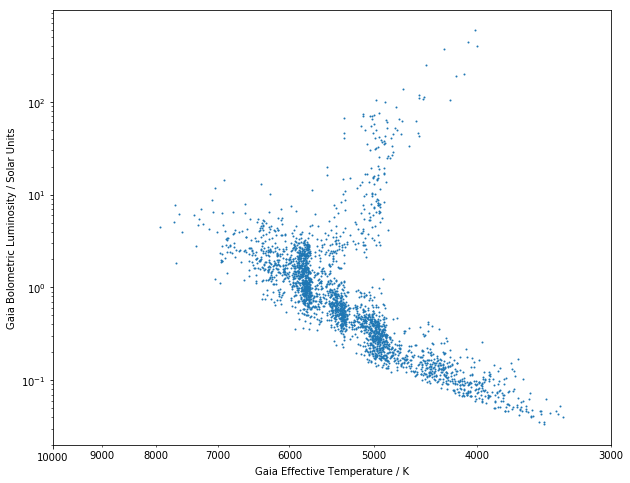

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xmatch_data.data['Gaia_Teff'],xmatch_data.data['Gaia_Lum'], s=1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Gaia Bolometric Luminosity / Solar Units')
ax.set_xlabel('Gaia Effective Temperature / K')
ax.set_xlim([1e4, 3e3])
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.show()

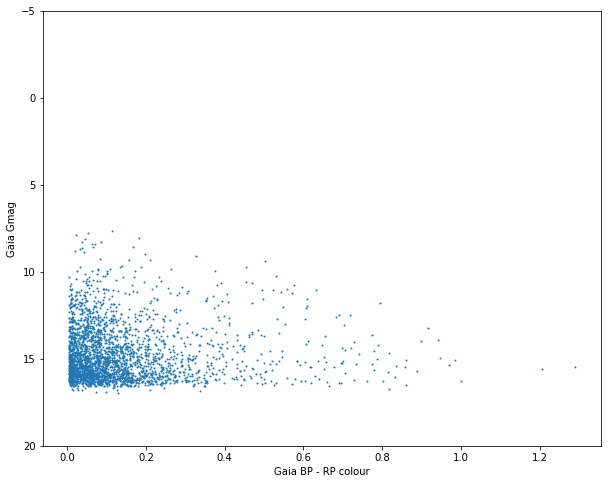

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xmatch_data.data['Gaia_E(BP-RP)'],
           xmatch_data.data['Gaia_Gmag'], s=1)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylabel('Gaia Gmag')
ax.set_xlabel('Gaia BP - RP colour')
# ax.set_xlim([1e4, 3e3])
ax.set_ylim([20, -5])
# ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.show()